## Preparations

In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
from fastai.vision import * 
from fastai.metrics import error_rate

In [7]:
batch_size = 64

### Load Images

In [4]:
?untar_data

In [6]:
path = untar_data("data/sienet"); path

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/sienet')

In [11]:
str(path)

'/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/sienet'

In [12]:
file_names = 

In [13]:
file_names

[]

In [14]:
doc(ImageDataBunch.from_folder)

In [15]:
data = ImageDataBunch.from_folder(path, 
                                  size=224, 
                                  bs = batch_size,
                                  valid_pct = 0.2
                                 ).normalize(imagenet_stats)

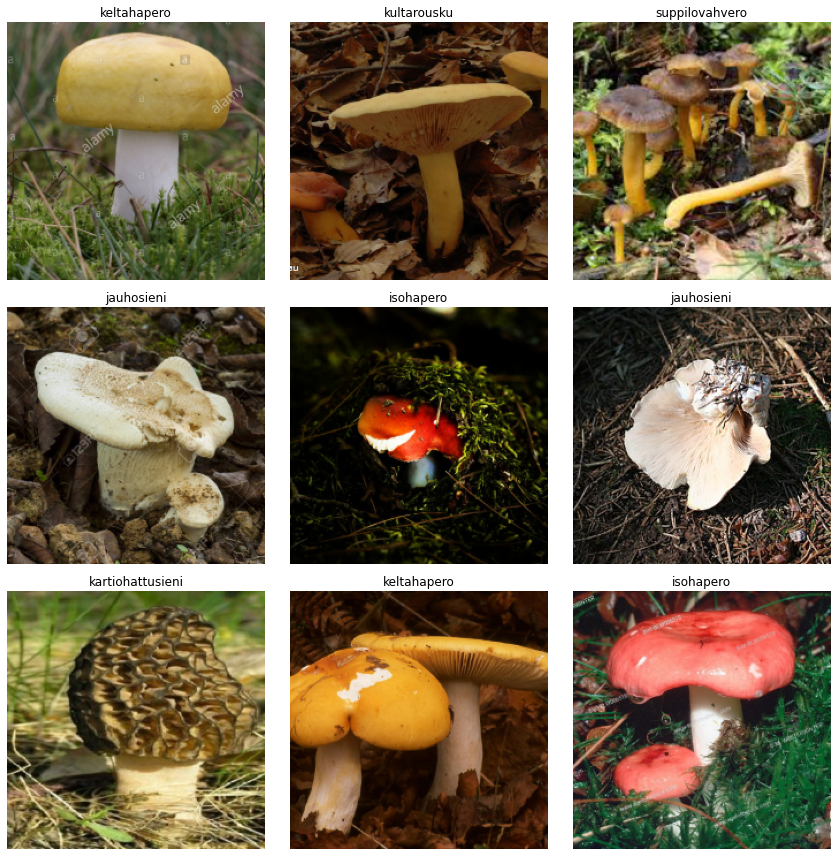

In [16]:
data.show_batch(3)

In [17]:
len(data.classes), data.classes

(15,
 ['herkkutatti',
  'isohapero',
  'jauhosieni',
  'kanttarelli',
  'kartiohattusieni',
  'kehnäsieni',
  'keltahapero',
  'kevatkaunolakki',
  'koivunkantosieni',
  'kosteikkovahvero',
  'kultarousku',
  'kuusenherkkusieni',
  'mustatorvisieni',
  'suppilovahvero',
  'ukonsieni'])

## Model Training ResNet34

In [33]:
model = cnn_learner(data, models.resnet34, metrics=error_rate)

In [34]:
model.fit_one_cycle(3)

epoch     train_loss  valid_loss  error_rate  time    
0         3.580591    1.700801    0.510204    00:06     
1         2.160619    1.210056    0.340136    00:06     
2         1.478065    1.124025    0.333333    00:06     


In [35]:
model.save("resnet34_stage1")

## Results

In [66]:
results = ClassificationInterpretation.from_learner(model)

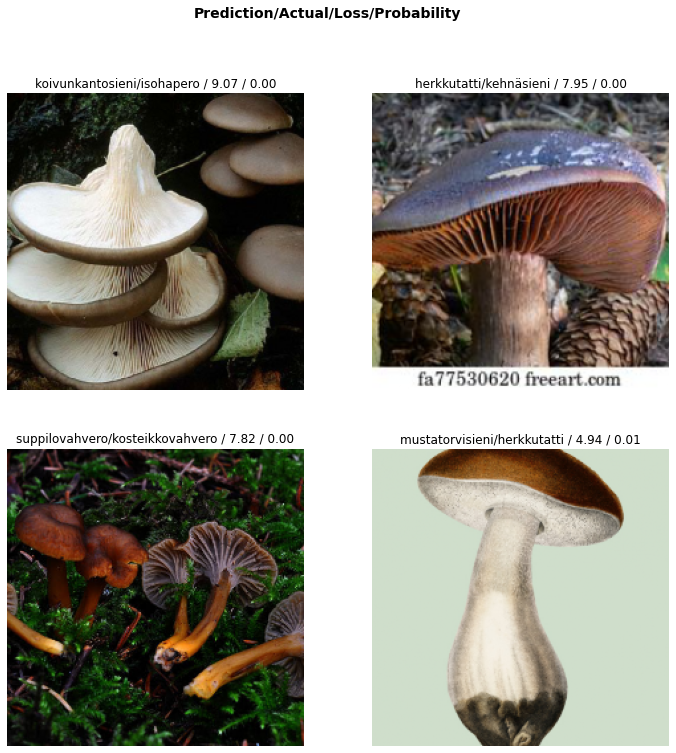

In [67]:
results.plot_top_losses(4)

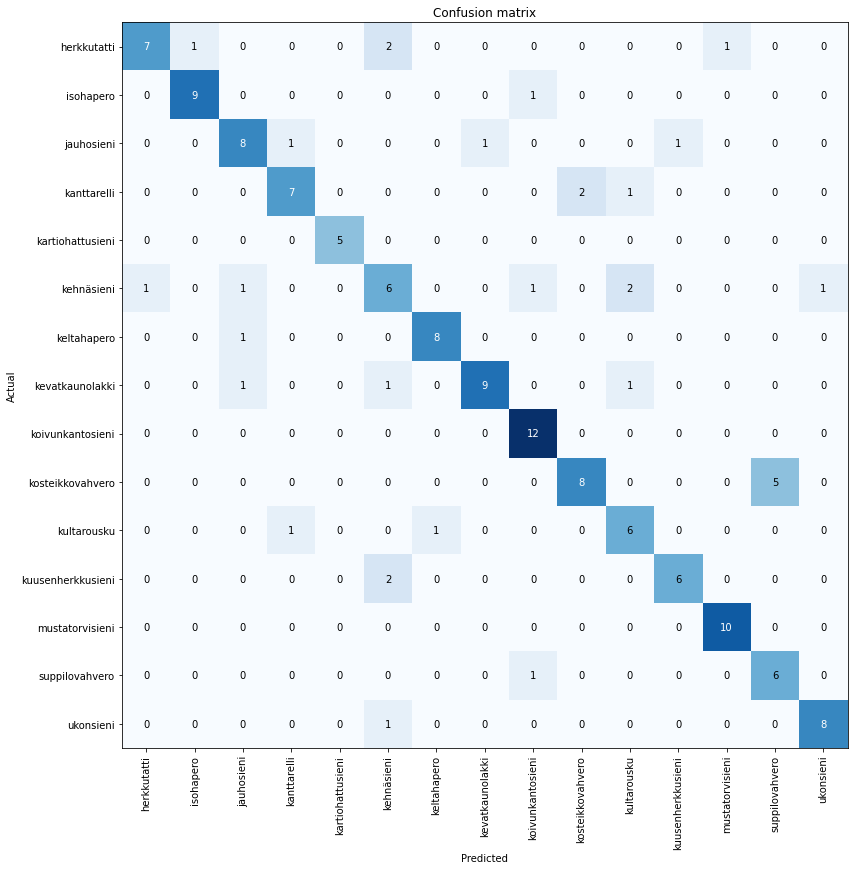

In [68]:
results.plot_confusion_matrix(figsize=(12,12))

In [28]:
results.most_confused(3)

[('kosteikkovahvero', 'suppilovahvero', 6), ('herkkutatti', 'kehnäsieni', 3)]

## Improving Reults

In [29]:
model.lr_find()

epoch     train_loss  valid_loss  error_rate  time    
0         0.133458    #na#        00:04       
1         0.113584    #na#        00:04       
2         0.106155    #na#        00:04       
3         0.103562    #na#        00:04       
4         0.096861    #na#        00:04       
5         0.097490    #na#        00:04       
6         0.092979    #na#        00:04       
7         0.136533    #na#        00:04       
8         0.361051    #na#        00:04       
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/opt/conda/lib/python3.7/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


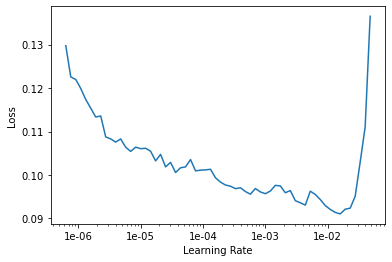

In [30]:
model.recorder.plot()

In [ ]:
model

In [36]:
learning_rates = slice(1e-4, 1e-3)

In [37]:
model.unfreeze()
model.fit_one_cycle(2, max_lr = learning_rates)

epoch     train_loss  valid_loss  error_rate  time    
0         0.510938    1.107462    0.299320    00:06     
1         0.367204    0.965286    0.265306    00:06     


In [38]:
model.save("resnet34_stage2")

In [39]:
model.fit_one_cycle(2, max_lr = learning_rates)

epoch     train_loss  valid_loss  error_rate  time    
0         0.163455    0.855058    0.238095    00:06     
1         0.113852    0.851024    0.217687    00:06     


In [40]:
model.save("resnet34_stage3")

In [41]:
model.fit_one_cycle(2, max_lr = learning_rates)

epoch     train_loss  valid_loss  error_rate  time    
0         0.070160    0.833250    0.224490    00:06     
1         0.050613    0.776697    0.217687    00:06     


## Model Training ResNet50

In [53]:
data = ImageDataBunch.from_folder(path,
                                 size = 224,
                                 bs = int(batch_size/2),
                                 valid_pct= 0.2).normalize(imagenet_stats)

In [54]:
model2 = cnn_learner(data, models.resnet50, metrics=error_rate)

In [56]:
model2.fit_one_cycle(1)

epoch     train_loss  valid_loss  error_rate  time    
0         0.123473    0.946988    0.299320    00:05     


In [57]:
model2.save("resnet50_stage1")

### Improving Results

In [58]:
model2.lr_find()

epoch     train_loss  valid_loss  error_rate  time    
0         0.110442    #na#        00:04       
1         0.109421    #na#        00:04       
2         0.092824    #na#        00:04       
3         0.203509    #na#        00:04       
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/opt/conda/lib/python3.7/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


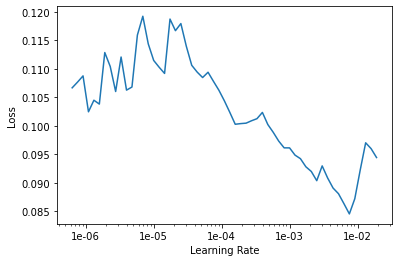

In [59]:
model2.recorder.plot()

In [60]:
learning_rates = slice(1e-4, 1e-3)

In [61]:
model2.unfreeze()

In [62]:
model2.fit_one_cycle(4, learning_rates)

epoch     train_loss  valid_loss  error_rate  time    
0         0.135740    1.366220    0.360544    00:07     
1         0.495557    3.744068    0.408163    00:06     
2         0.483649    1.287288    0.319728    00:06     
3         0.354061    1.203262    0.306122    00:06     


In [63]:
model2.fit_one_cycle(2, learning_rates)

epoch     train_loss  valid_loss  error_rate  time    
0         0.085774    1.150605    0.265306    00:06     
1         0.074955    1.285918    0.292517    00:06     


In [64]:
learning_rates = slice(1e-5, 1e-4)

In [65]:
model2.fit_one_cycle(2, learning_rates)

epoch     train_loss  valid_loss  error_rate  time    
0         0.055106    1.236646    0.285714    00:06     
1         0.047665    1.198263    0.285714    00:06     
